In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasgui
from scipy.stats import zscore
from tkinter import Tk
from tkinter.filedialog import askdirectory
from scipy import stats

In [3]:
def getpath(n = 2):
    Day0=[]
    for i in range(n):
        path = askdirectory(title='Select Folder') # shows dialog box and return the path
        Day0.append(path)
    return Day0

In [4]:
def get_dose(starting = 10, d_factor = 3 , steps = 9, end = 0):
    Dose = [starting]
    for i in range(0, steps-1,1):
        Dose.append(round(Dose[-1]/d_factor,4))
    Dose.append(0)
    return Dose
    
Dose = get_dose()

In [4]:
Dose

[10, 3.3333, 1.1111, 0.3704, 0.1235, 0.0412, 0.0137, 0.0046, 0.0015, 0]

In [411]:
Plates = getpath(2)
    


In [23]:
Dose

[10, 3.3333, 1.1111, 0.3704, 0.1235, 0.0412, 0.0137, 0.0046, 0.0015, 0]

In [20]:
Dose_rev = []

In [21]:
for i in range(-1,-len(Dose)-1,-1):
    Dose_rev.append(Dose[i])

In [22]:
Dose_rev

[0, 0.0015, 0.0046, 0.0137, 0.0412, 0.1235, 0.3704, 1.1111, 3.3333, 10]

In [5]:
def getplatedata(A):
    filename = A
    readfile = open(filename, "r")
    Z = readfile.readlines()
    T =[]
    
    for i in range(8, len(Z)):
        T.append(Z[i])
    P = []
    for i in range(len(T)):
        P.append(T[i].split('\t'))
    df = pd.DataFrame(P[1:], columns = P[0])
    df = df[['Row','Column','Confluency']]
    df = df.astype({'Row': np.int64, 'Column' : np.int64, 'Confluency' : np.float64})
    
    return df

In [33]:
getplatedata(Plates[0]+'/PlateResults.txt')

,Row,Column,Confluency
0,3,3,0.625844
1,3,4,0.657621
2,3,5,0.604500
3,3,6,0.626783
4,3,7,0.598397
...,...,...,...
247,14,19,0.643301
248,14,20,0.647689
249,14,21,0.695493
250,14,22,0.621022


In [49]:
def conf_platedata():
    Day0 = getplatedata(Plates[0]+'/PlateResults.txt')
    Day3 = getplatedata(Plates[1]+'/PlateResults.txt')
    Difference = Day3['Confluency'] - Day0['Confluency']
    newdf = Day0[['Row','Column']]
    newdf['Confluency'] = Difference
    newdf = newdf[(newdf['Row'] >3) & (newdf['Row'] < 14)]
    newdf1 = newdf[(newdf['Column'] < 13)]
    newdf2 = newdf[(newdf['Column']>= 13)&(newdf['Column']< 23)]
    newdff1 = newdf1.pivot('Row','Column','Confluency')
    newdff2 = newdf2.pivot('Row','Column','Confluency')
    dmso_avg = (newdff1[12][13]+newdff2[22][13])/2
    newdff1 = newdff1/dmso_avg
    newdff2 = newdff2/dmso_avg
    
    #newdff1 = newdff1/newdff1[12][13]
    #newdff2 = newdff2/newdff2[22][13] 
    
    
    table1 = newdff1.apply(lambda x: [y if y <= 1 else 1 for y in x])
    table2 = newdff2.apply(lambda x: [y if y <= 1 else 1 for y in x])
   
    table1_t = newdff1.apply(lambda x: [y if y <= 1 else 1 for y in x])
    table2_t = newdff2.apply(lambda x: [y if y <= 1 else 1 for y in x])
   
    
    
    return table1_t, table2_t

    

In [63]:
def conf_platedata_z():
    Day0 = getplatedata(Plates[0]+'/PlateResults.txt')
    Day3 = getplatedata(Plates[1]+'/PlateResults.txt')
    Difference = Day3['Confluency'] - Day0['Confluency']
    newdf = Day0[['Row','Column']]
    newdf['Confluency'] = Difference
    newdf = newdf[(newdf['Row'] >3) & (newdf['Row'] < 14)]
    newdf1 = newdf[(newdf['Column'] < 13)]
    newdf2 = newdf[(newdf['Column']>= 13)&(newdf['Column']< 23)]
    newdff1 = newdf1.pivot('Row','Column','Confluency')
    newdff2 = newdf2.pivot('Row','Column','Confluency')
    
    newdff1 = pd.DataFrame(stats.zscore(newdff1))
    newdff2 = pd.DataFrame(stats.zscore(newdff2))
    
    #newdff1 = newdff1/newdff1[12][13]
    #newdff2 = newdff2/newdff2[22][13] 
    
    
    #table1 = newdff1.apply(lambda x: [y if y <= 1 else 1 for y in x])
    #table2 = newdff2.apply(lambda x: [y if y <= 1 else 1 for y in x])
   
    #table1_t = newdff1.apply(lambda x: [y if y <= 1 else 1 for y in x])
    #table2_t = newdff2.apply(lambda x: [y if y <= 1 else 1 for y in x])
   
    
    
    return newdff1, newdff2


In [7]:
def avg_platedata():
    
    Day0 = getplatedata(Plates[0]+'/PlateResults.txt')
    Day3 = getplatedata(Plates[1]+'/PlateResults.txt')
    Difference = Day3['Confluency'] - Day0['Confluency']
    newdf = Day0[['Row','Column']]
    newdf['Confluency'] = Difference
    newdf = newdf[(newdf['Row'] >3) & (newdf['Row'] < 14)]
    newdf1 = newdf[(newdf['Column'] < 13)]
    newdf2 = newdf[(newdf['Column']>= 13)&(newdf['Column']< 23)]
    newdff1 = newdf1.pivot('Row','Column','Confluency')
    newdff2 = newdf2.pivot('Row','Column','Confluency')
    
        
    
    return newdff1, newdff2

In [11]:
Plates = getpath(2)

In [12]:
Plates

['C:/Users/parke15/Documents/Python Scripts/Genesis_SKOV3/Day0/CP-3-1__2021-08-24T16_37_36-Measurement 18/Evaluation3',
 'C:/Users/parke15/Documents/Python Scripts/Genesis_SKOV3/Day3/CP-3-1__2021-08-26T21_05_33-Measurement 19/Evaluation3']

In [359]:
Plate1a, Plate1b = avg_platedata()


In [361]:
Plate2a, Plate2b = avg_platedata()

In [363]:
Plate3a, Plate3b = avg_platedata()

In [364]:
Plate_a_avg = (Plate1a + Plate2a+ Plate3a)/3

In [365]:
Plate_a_avg_nm = Plate_a_avg/Plate_a_avg[12][13]

In [366]:
Plate_a_avg_nm = Plate_a_avg_nm.apply(lambda x: [y if y <= 1 else 1 for y in x])

In [367]:
Plate_b_avg = (Plate1b+Plate2b+Plate3b)/3

In [368]:
Plate_b_avg

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.100221,0.146865,0.134484,0.129565,0.133303,0.089927,0.125007,0.125336,0.066157,0.079963
5,0.147121,0.163060,0.144645,0.141915,0.127909,0.114677,0.096529,0.137710,0.092933,0.082157
6,0.128989,0.112035,0.089300,0.102753,0.116142,0.094472,0.117807,0.093113,0.051434,0.087072
7,0.121527,0.194978,0.167701,0.143877,0.193852,0.119411,0.122715,0.141217,0.112543,0.088488
8,0.186420,0.245260,0.234528,0.249718,0.191821,0.168460,0.223485,0.220658,0.153360,0.143777
9,0.128179,0.236520,0.296847,0.410972,0.306746,0.318577,0.324644,0.333280,0.267791,0.258952
10,0.411514,0.427922,0.484178,0.548354,0.558471,0.510279,0.453769,0.441547,0.398403,0.393278
11,0.551637,0.524933,0.480621,0.627809,0.526866,0.611725,0.494009,0.563705,0.540267,0.517516
12,0.374397,0.587257,0.451875,0.487794,0.430799,0.417122,0.415739,0.442145,0.358882,0.390877


In [369]:
Plate_b_avg_nm = Plate_b_avg/Plate_b_avg[22][13]

In [370]:
Plate_b_avg_nm

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.281024,0.411815,0.377099,0.363306,0.373788,0.252158,0.350524,0.351448,0.185506,0.224219
5,0.412534,0.457228,0.405591,0.397936,0.358662,0.321558,0.270670,0.386146,0.260587,0.230372
6,0.361690,0.314151,0.250400,0.288122,0.325666,0.264902,0.330334,0.261093,0.144224,0.244152
7,0.340767,0.546725,0.470239,0.403438,0.543569,0.334834,0.344099,0.395978,0.315575,0.248123
8,0.522729,0.687719,0.657626,0.700219,0.537873,0.472368,0.626662,0.618734,0.430026,0.403158
9,0.359418,0.663211,0.832369,1.152382,0.860129,0.893302,0.910316,0.934530,0.750897,0.726112
10,1.153902,1.199909,1.357653,1.537606,1.565974,1.430842,1.272386,1.238114,1.117136,1.102767
11,1.546811,1.471933,1.347680,1.760402,1.477352,1.715300,1.385219,1.580652,1.514930,1.451136
12,1.049823,1.646693,1.267075,1.367793,1.207978,1.169627,1.165748,1.239791,1.006318,1.096035


In [371]:
Plate_b_avg_nm = Plate_b_avg_nm.apply(lambda x: [y if y <= 1 else 1 for y in x])

In [372]:
Attempting2 = flip_table(Plate_b_avg_nm)

In [373]:
Attempting = flip_table(Plate_a_avg_nm)

In [240]:
Attempting2

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,0.936197,0.893159,0.953478,0.701846,0.794130,0.734664,0.539811,0.432239,0.291023
0.0015,0.977421,0.916971,0.854618,0.822571,0.729071,0.674074,0.638338,0.602878,0.497940,0.335768
0.0046,1.000000,0.903363,0.924848,0.885993,0.675258,0.678055,0.717498,0.603779,0.555147,0.465014
0.0137,0.996310,0.932534,0.852328,0.790925,0.859965,0.697055,0.646813,0.587899,0.566970,0.417624
0.0412,1.000000,0.895053,0.812570,0.798685,0.790178,0.681501,0.696642,0.582302,0.439562,0.291663
0.1235,0.961984,0.922189,0.910912,0.910371,0.857073,0.748334,0.698163,0.651586,0.571266,0.318393
0.3704,1.000000,0.965313,0.883062,0.799991,0.757390,0.762104,0.597240,0.685503,0.555571,0.421080
1.1111,0.920472,0.985203,0.872960,0.838648,0.774173,0.727879,0.675368,0.655635,0.558254,0.602135
3.3333,0.780583,0.872792,0.699829,0.794383,0.723495,0.719906,0.570417,0.574820,0.513165,0.348319
10.0000,0.472898,0.242884,0.329348,0.402877,0.344130,0.235351,0.161269,0.082471,0.050648,0.014285


In [71]:
### use this function to draw heatmap n = table #, drug_A = y-axis drug, drug_B = x-axis drug, Title = Cell line

def get_heatmap(n, drug_A='', drug_B='', Title = ''):
    j = 1
    for i in n.min():
        if j > i:
            j= i
    if j < 0:
        hmin = 0
    else:
        hmin = round(j,1)
    
    hmax = 1
    fig = plt.figure(figsize=(8, 10))
    
    fig=sns.heatmap(n, linewidths=.8,cmap='RdYlBu_r', cbar_kws={'ticks':[hmin, round((hmin+hmax)/2,2), hmax],'orientation':'horizontal', 'shrink': .5,"label": "Relative confluence"},vmin = hmin, vmax=1, center = (hmin+hmax)/2)
    
    plt.xticks(rotation="45")
    plt.yticks(rotation="0")

    fig.set_ylabel(drug_A + ' (uM)',fontsize = 15)
    
    fig.set_xlabel (drug_B + ' (uM)', fontsize = 15)
    fig.set_title(Title + '\n', fontsize =25)
    return fig
    

In [72]:
def get_heatmap_z(n, drug_A='', drug_B='', Title = ''):
    hmin = -2
    hmax = 2
    fig = plt.figure(figsize=(8, 10))
    
    fig=sns.heatmap(n, linewidths=.8,cmap='RdYlBu_r', cbar_kws={'ticks':[hmin, round((hmin+hmax)/2,2), hmax],'orientation':'horizontal', 'shrink': .5,"label": "Relative confluence"},vmin = hmin, vmax=hmax, center = (hmin+hmax)/2)
    
    plt.xticks(rotation="45")
    plt.yticks(rotation="0")

    fig.set_ylabel(drug_A + ' (uM)',fontsize = 15)
    
    fig.set_xlabel (drug_B + ' (uM)', fontsize = 15)
    fig.set_title(Title + '\n', fontsize =25)
    return fig

In [76]:
Plates = getpath(2)

In [77]:

table1, table2 = conf_platedata_z()

In [78]:
table1

,0,1,2,3,4,5,6,7,8,9
0,-1.277394,-1.730265,-1.643438,-2.136275,-1.367550,-1.838891,-2.186795,-1.987888,-1.842587,-2.043301
1,-1.215536,-1.323939,-1.164124,-1.230283,-0.885033,-1.154368,-1.331142,-1.456216,-1.454052,-1.076047
2,0.062577,-0.908254,-0.658953,-0.818763,-0.146852,-0.532650,-0.704378,-0.733738,-0.727473,-1.084614
3,0.092308,-0.491812,0.669172,-0.171403,0.865986,0.109983,0.304818,0.055730,-0.123282,0.445285
4,0.439589,0.094629,0.971697,0.854728,0.525613,0.787777,0.892525,0.714845,0.462454,0.950519
5,1.293358,0.696877,0.712240,0.637024,0.039998,0.733341,0.861217,0.615381,0.532172,0.777535
6,1.064414,0.842989,1.378959,0.834855,-1.023774,0.793534,0.615599,0.686345,0.596573,0.451765
7,-0.017771,0.523683,-0.848432,0.585487,1.632270,1.376504,0.251850,0.449505,0.326430,0.189145
8,1.154276,1.336565,0.931439,0.681298,1.302208,-0.934292,0.782389,0.352514,1.615252,1.232820
9,-1.595820,0.959527,-0.348560,0.763333,-0.942865,0.659061,0.513916,1.303523,0.614513,0.156893


In [79]:
table2

,0,1,2,3,4,5,6,7,8,9
0,-2.068774,-0.541580,-1.218888,-1.270767,0.480798,-0.479525,-0.879063,-0.464849,-0.705284,-1.129099
1,-1.402254,-0.324743,-0.525022,-0.889305,-0.680194,0.286357,-0.566721,-0.367667,0.561974,-0.953183
2,0.190300,0.799257,0.820903,-0.146223,0.727212,0.694140,0.243156,0.624005,-0.399535,0.539559
3,0.082288,0.509049,0.314219,0.234503,0.091866,1.404738,0.373053,1.425929,0.296071,0.767661
4,1.131717,0.384045,0.658618,0.234654,1.213799,-0.321504,0.760994,0.871180,1.331076,1.111795
5,-0.215647,1.741671,0.460966,0.572023,0.349855,0.740930,0.717948,0.984321,0.505562,0.869522
6,1.270578,0.728936,1.624100,0.461704,-1.372597,1.381254,1.550145,0.750651,1.419455,0.926804
7,0.785501,-0.149168,-1.863029,1.884621,1.544239,-0.987684,0.808786,-1.072410,0.087626,0.597306
8,0.364743,-1.485682,-0.716557,0.639685,-1.433936,-1.331653,-1.379227,-1.364283,-1.765325,-1.385303
9,-0.138452,-1.661785,0.444690,-1.720894,-0.921041,-1.387052,-1.629071,-1.386877,-1.331620,-1.345061


In [53]:
odd_drugA = 'Cisplatin'
odd_drugB = 'Taselisib'
odd_drugC = 'Axitinib'
cell_line = 'SKOV3'
even_drugA = 'Taselisib'
even_drugB = 'Trametinib'
even_drugC = 'Mocetinostat'

In [18]:
def flip_table(table):
    table.columns = Dose
    table.index = Dose
    table = table.reindex(columns=Dose_rev, index= Dose_rev)
    return table


In [80]:
K6066_a = flip_table(table1)

In [81]:
K6066_b = flip_table(table2)

In [36]:
K6066_b

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,0.755561,0.705626,0.642670,0.952505,1.000000,1.000000,0.636703,0.976803,1.000000
0.0015,0.926670,0.977325,0.710345,0.645892,0.988948,1.000000,1.000000,0.838171,1.000000,1.000000
0.0046,0.934492,0.639339,1.000000,0.851047,1.000000,0.949427,0.639039,0.764524,1.000000,1.000000
0.0137,0.900635,1.000000,1.000000,0.476875,0.488037,0.571961,1.000000,0.727705,1.000000,1.000000
0.0412,0.877888,1.000000,1.000000,1.000000,1.000000,0.946295,1.000000,0.643971,1.000000,1.000000
0.1235,0.938893,0.995451,1.000000,1.000000,0.951100,1.000000,1.000000,0.805952,0.972219,1.000000
0.3704,0.886043,0.905033,1.000000,1.000000,1.000000,1.000000,0.940971,0.793067,1.000000,0.988019
1.1111,0.808254,0.836363,0.973441,0.864830,1.000000,1.000000,0.950097,0.704469,1.000000,1.000000
3.3333,0.687350,0.724407,0.829585,0.977768,1.000000,0.851627,0.855290,1.000000,0.671939,0.862186
10.0000,0.690376,0.890643,0.735660,0.618437,0.792623,0.699349,0.679859,0.694602,0.651215,0.678988


In [37]:
K6066_b = flip_table(table2)

<AxesSubplot:title={'center':'SKOV3\n'}, xlabel='Taselisib (uM)', ylabel='Cisplatin (uM)'>

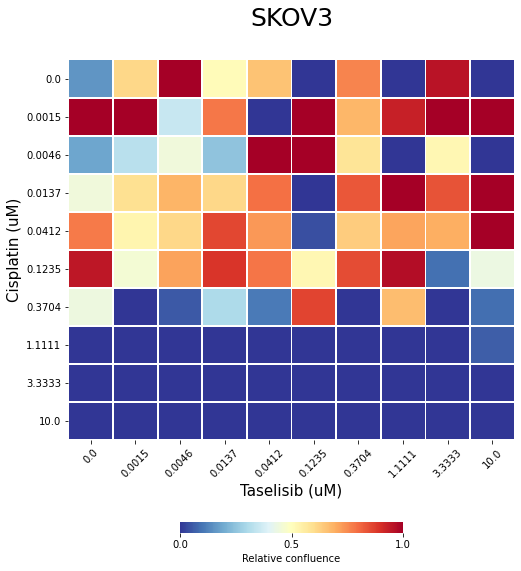

In [82]:
get_heatmap(K6066_a, odd_drugA,odd_drugB,cell_line)
#plt.savefig('{0}.png'.format(cell_line+"_"+odd_drugA+"_"+odd_drugB+'_'+"3"), dpi=300, bbox_inches='tight',facecolor='w')
#plt.show()

<AxesSubplot:title={'center':'SKOV3\n'}, xlabel='Taselisib (uM)', ylabel='Cisplatin (uM)'>

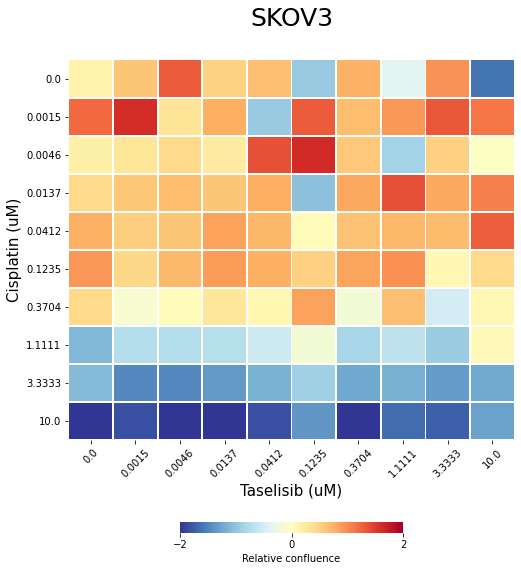

In [83]:
get_heatmap_z(K6066_a, odd_drugA,odd_drugB,cell_line)

<AxesSubplot:title={'center':'SKOV3\n'}, xlabel='Axitinib (uM)', ylabel='Cisplatin (uM)'>

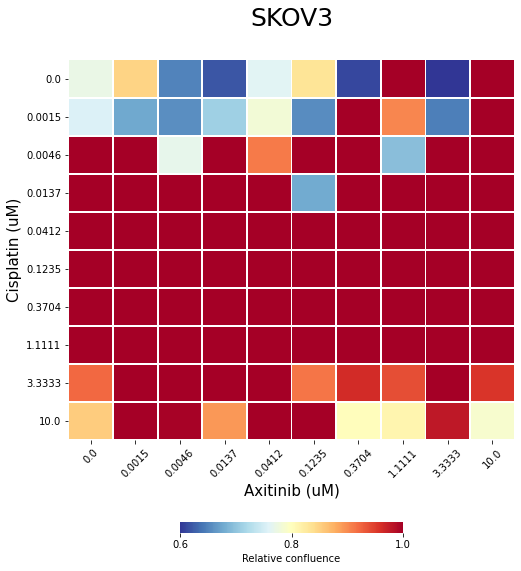

In [57]:
get_heatmap(K6066_b, odd_drugA, odd_drugC, cell_line)
#plt.savefig('{0}.png'.format(cell_line+"_"+odd_drugA+"_"+odd_drugC+'_'+"3"), dpi=300, bbox_inches='tight',facecolor='w')
#plt.show()

<AxesSubplot:title={'center':'SKOV3\n'}, xlabel='Axitinib (uM)', ylabel='Cisplatin (uM)'>

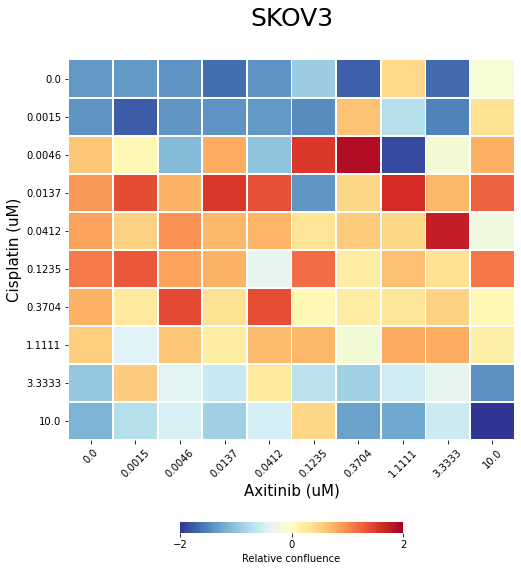

In [84]:
get_heatmap_z(K6066_b, odd_drugA,odd_drugC,cell_line)

In [85]:
K6066_b

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,-1.345061,-1.331620,-1.386877,-1.629071,-1.387052,-0.921041,-1.720894,0.444690,-1.661785,-0.138452
0.0015,-1.385303,-1.765325,-1.364283,-1.379227,-1.331653,-1.433936,0.639685,-0.716557,-1.485682,0.364743
0.0046,0.597306,0.087626,-1.072410,0.808786,-0.987684,1.544239,1.884621,-1.863029,-0.149168,0.785501
0.0137,0.926804,1.419455,0.750651,1.550145,1.381254,-1.372597,0.461704,1.624100,0.728936,1.270578
0.0412,0.869522,0.505562,0.984321,0.717948,0.740930,0.349855,0.572023,0.460966,1.741671,-0.215647
0.1235,1.111795,1.331076,0.871180,0.760994,-0.321504,1.213799,0.234654,0.658618,0.384045,1.131717
0.3704,0.767661,0.296071,1.425929,0.373053,1.404738,0.091866,0.234503,0.314219,0.509049,0.082288
1.1111,0.539559,-0.399535,0.624005,0.243156,0.694140,0.727212,-0.146223,0.820903,0.799257,0.190300
3.3333,-0.953183,0.561974,-0.367667,-0.566721,0.286357,-0.680194,-0.889305,-0.525022,-0.324743,-1.402254
10.0000,-1.129099,-0.705284,-0.464849,-0.879063,-0.479525,0.480798,-1.270767,-1.218888,-0.541580,-2.068774


In [86]:
Attempting

NameError: name 'Attempting' is not defined

In [241]:
Attempting = flip_table(Plate_a_avg_nm)

In [375]:
Attempting = Attempting.apply(lambda x: [y if y >= 0 else 0 for y in x])

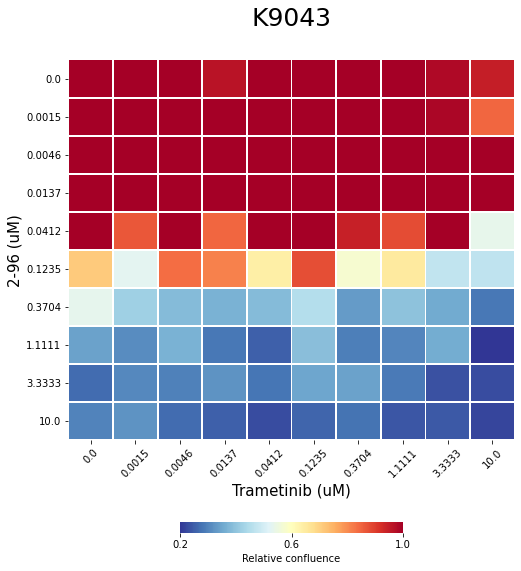

In [381]:
get_heatmap(Attempting, odd_drugA,odd_drugB,cell_line)
plt.savefig('{0}.png'.format(cell_line+"_"+odd_drugA+"_"+odd_drugB+'_'+"avg"), dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

In [377]:
Attempting2

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.0015,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.0046,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.0137,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.0412,0.726112,0.750897,0.934530,0.910316,0.893302,0.860129,1.000000,0.832369,0.663211,0.359418
0.1235,0.403158,0.430026,0.618734,0.626662,0.472368,0.537873,0.700219,0.657626,0.687719,0.522729
0.3704,0.248123,0.315575,0.395978,0.344099,0.334834,0.543569,0.403438,0.470239,0.546725,0.340767
1.1111,0.244152,0.144224,0.261093,0.330334,0.264902,0.325666,0.288122,0.250400,0.314151,0.361690
3.3333,0.230372,0.260587,0.386146,0.270670,0.321558,0.358662,0.397936,0.405591,0.457228,0.412534
10.0000,0.224219,0.185506,0.351448,0.350524,0.252158,0.373788,0.363306,0.377099,0.411815,0.281024


In [224]:
Attempting2= flip_table(table2)

In [294]:
Attempting2.min()

0.0000     0.256923
0.0015     0.629197
0.0046     0.442373
0.0137     0.149012
0.0412     0.156793
0.1235     0.272711
0.3704     0.177510
1.1111     0.186020
3.3333    -0.519104
10.0000   -0.601351
dtype: float64

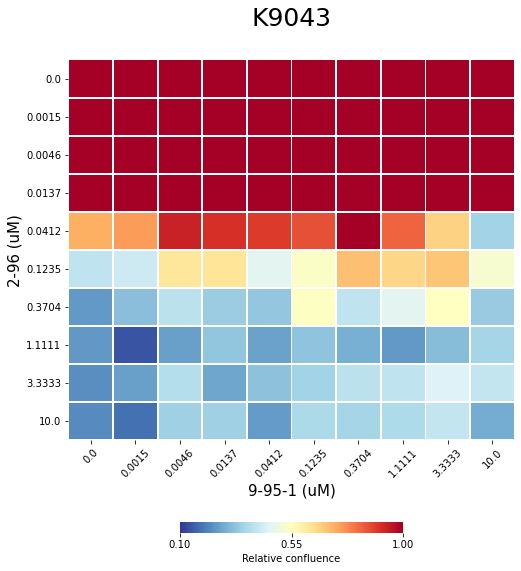

In [382]:
get_heatmap(Attempting2, odd_drugA,odd_drugC,cell_line)
plt.savefig('{0}.png'.format(cell_line+"_"+odd_drugA+"_"+odd_drugC+'_'+"avg"), dpi=300, bbox_inches='tight',facecolor='w')
plt.show()


In [226]:
Attempting2 = Attempting2.apply(lambda x: [y if y >= 0 else 0 for y in x])

In [227]:
Attempting2

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,1.000000,0.778468,0.787126,0.427460,0.667417,0.561953,0.441874,0.338636,0.204732
0.0015,0.985250,0.952427,0.861162,0.613254,0.514430,0.527429,0.503386,0.542550,0.368023,0.243042
0.0046,0.991386,0.806586,0.976301,0.876663,0.688060,0.527449,0.569328,0.488557,0.516164,0.416785
0.0137,1.000000,1.000000,0.834170,0.819806,0.612998,0.519874,0.499725,0.495089,0.385315,0.375727
0.0412,1.000000,1.000000,0.873043,0.690323,0.703267,0.539340,0.655320,0.401874,0.254274,0.175952
0.1235,1.000000,0.931522,1.000000,0.911896,0.817157,0.677119,0.596812,0.488160,0.335040,0.231271
0.3704,1.000000,1.000000,0.881025,0.720481,0.596168,0.611337,0.523931,0.623139,0.430736,0.300876
1.1111,0.933719,1.000000,0.822146,0.801927,0.550646,0.671894,0.518733,0.524586,0.364295,0.394914
3.3333,0.545177,0.753628,0.721945,0.768906,0.612825,0.647595,0.490746,0.445541,0.487154,0.264396
10.0000,0.450760,0.145780,0.204802,0.317059,0.270648,0.137441,0.094841,0.037541,0.040782,0.022265


In [263]:
get_heatmap(Attempting2, even_drugA,even_drugC,cell_line)


        
           

ValueError: 'mediumslateblue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<Figure size 720x720 with 0 Axes>

In [369]:
Attempting2

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,1.000000,0.936084,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
0.0015,1.000000,0.993881,1.000000,0.910095,1.000000,1.000000,1.000000,1.000000,1.0,1.0
0.0046,1.000000,0.982017,0.934726,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
0.0137,0.933368,0.891621,1.000000,0.993142,1.000000,0.910081,1.000000,1.000000,1.0,1.0
0.0412,1.000000,1.000000,0.706603,1.000000,0.815118,1.000000,1.000000,0.994023,1.0,1.0
0.1235,0.526108,0.521460,0.682305,0.312793,0.427754,0.491265,0.032343,0.026498,0.0,0.0
0.3704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200916,0.000000,0.0,0.0
1.1111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3.3333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


<AxesSubplot:title={'center':'K8484'}, xlabel='9-95-1 (uM)', ylabel='2-96 (uM)'>

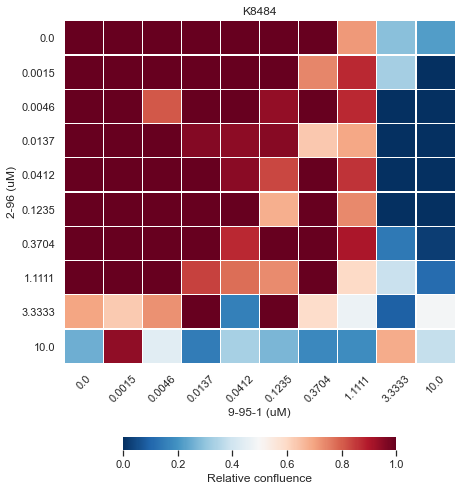

In [318]:

get_heatmap(Attempting2, '2-96','9-95-1','K8484')

In [256]:
table2

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.157109,0.394449,0.321309,0.314317,0.280286,0.300664,0.285208,0.328000,0.352845,0.252070
5,0.481039,0.354686,0.581450,0.422837,0.756952,0.517122,0.833857,0.645776,0.511388,0.624676
6,0.282914,0.318170,0.633106,0.737260,0.703136,0.872643,0.935772,0.997100,1.000000,0.874874
7,-0.031103,0.162100,0.746323,0.793739,0.870805,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.044611,0.085513,0.687956,0.864923,0.909639,1.000000,1.000000,1.000000,1.000000,0.992287
9,0.141932,0.216747,0.812559,0.933149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10,0.324153,0.235462,0.739315,0.832324,1.000000,1.000000,1.000000,1.000000,1.000000,0.976249
11,0.230009,0.294785,0.810212,0.881171,0.921454,0.923733,1.000000,1.000000,1.000000,0.953559
12,0.300049,0.417533,0.901964,0.967122,0.913759,1.000000,1.000000,1.000000,0.988209,0.857513


In [114]:
table3, table4 = conf_platedata()


In [117]:
table5, table6 = conf_platedata()

In [75]:
table1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,-0.206412,-0.145433,-0.168272,-0.157871,-0.216885,-0.223985,-0.248784,-0.214394,-0.224514,-0.236901
5,-0.224166,-0.163854,-0.135962,-0.149532,-0.252145,-0.252279,-0.257439,-0.262303,-0.220091,-0.203572
6,-0.189605,-0.157567,-0.105393,-0.129406,-0.214957,-0.279242,-0.257072,-0.240495,-0.270840,-0.186811
7,-0.321810,-0.135107,-0.148400,-0.215463,-0.261245,-0.340052,-0.298339,-0.269227,-0.157209,0.128739
8,-0.253043,-0.273995,-0.324573,-0.393950,-0.154506,0.127175,0.216020,0.522468,0.499178,0.641359
9,-0.436515,-0.207909,0.002544,0.221553,0.485281,0.749575,0.957523,1.000000,0.991608,1.000000
10,-0.182402,-0.014187,0.321581,0.353166,0.749202,0.839318,0.984690,1.000000,1.000000,0.928653
11,-0.010765,0.402655,0.645867,0.704711,0.895868,0.959471,1.000000,0.993260,0.924419,1.000000
12,0.426486,0.591912,0.734540,0.975519,0.957790,0.982468,1.000000,1.000000,1.000000,1.000000


In [133]:
table2

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.904679,0.964427,0.870705,0.957210,0.976286,0.976975,0.914714,0.997454,0.452620,0.711306
5,0.915330,0.832909,0.879861,0.880904,0.965611,0.882665,0.898365,0.936229,0.911025,0.852869
6,0.899552,0.916706,0.911360,0.864336,0.904953,0.929411,0.932873,0.871679,0.867563,0.914705
7,0.932803,0.998549,0.863733,0.953682,0.896691,0.831858,0.931921,0.942787,0.895890,0.889949
8,0.982296,0.948952,0.867929,0.887243,0.981234,0.935166,1.000000,0.979466,0.933556,1.000000
9,0.858254,0.815616,0.855816,0.943391,0.849146,0.833722,0.893708,1.000000,0.897260,0.992535
10,1.000000,0.965639,0.965374,0.905806,1.000000,0.960649,0.982614,0.969826,0.909874,1.000000
11,0.981522,0.844362,1.000000,0.921312,0.865367,0.945536,1.000000,1.000000,0.994562,0.903513
12,1.000000,1.000000,1.000000,0.903244,1.000000,1.000000,0.994301,0.895743,0.942234,0.923176


In [119]:
avg2 = (table2+table4+table6)/3

In [132]:
Plate2b

NameError: name 'Plate2b' is not defined

In [118]:
avg = (table1+table3+table5)/3

In [126]:
avg.min()

Column
3     0.488692
4     0.514601
5     0.545988
6     0.510061
7     0.553539
8     0.566453
9     0.527074
10    0.520695
11    0.596483
12    0.569577
dtype: float64

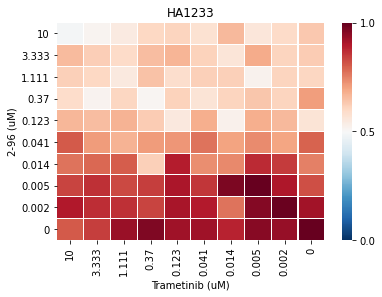

In [121]:
get_heatmap(avg, '2-96','Trametinib','HA1233')
plt.savefig('HA1233_2-96_Trametinib_avg.png', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

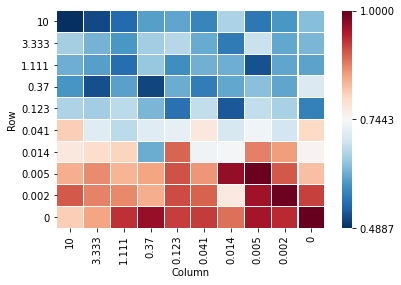

In [140]:
fig=sns.heatmap(avg,xticklabels=Dose,yticklabels=Dose, linewidths=.1,cmap = 'RdBu_r', cbar_kws={'ticks': [avg[3][4], ((avg[3][4]+1)/2), 1.0]},vmin=avg[3][4], vmax=1, center = ((avg[3][4]+1)/2))

In [138]:
fig.invert_yaxis()

In [144]:
flip_df = avg.transpose()

In [143]:
avg

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.488692,0.514601,0.545988,0.602757,0.609402,0.574962,0.663866,0.558687,0.596483,0.636269
5,0.657919,0.624129,0.595013,0.655349,0.671185,0.616093,0.564217,0.687009,0.611715,0.626975
6,0.620072,0.603646,0.549930,0.646897,0.586326,0.620764,0.619716,0.520695,0.609454,0.607310
7,0.593198,0.519399,0.605743,0.510061,0.616813,0.566453,0.611628,0.636977,0.609402,0.707709
8,0.666281,0.654513,0.675270,0.626883,0.553539,0.681834,0.527074,0.682263,0.662027,0.569577
9,0.808102,0.713460,0.674660,0.714323,0.721810,0.770568,0.700610,0.735521,0.697878,0.794661
10,0.771351,0.788343,0.802255,0.618099,0.892567,0.732590,0.739357,0.872456,0.850477,0.751337
11,0.838009,0.864265,0.831453,0.845252,0.907550,0.856341,0.968901,0.997825,0.903970,0.820918
12,0.900148,0.870795,0.866463,0.837835,0.912110,0.895240,0.769587,0.960540,0.994767,0.918488


In [146]:
flip_df.transpose()

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.488692,0.514601,0.545988,0.602757,0.609402,0.574962,0.663866,0.558687,0.596483,0.636269
5,0.657919,0.624129,0.595013,0.655349,0.671185,0.616093,0.564217,0.687009,0.611715,0.626975
6,0.620072,0.603646,0.549930,0.646897,0.586326,0.620764,0.619716,0.520695,0.609454,0.607310
7,0.593198,0.519399,0.605743,0.510061,0.616813,0.566453,0.611628,0.636977,0.609402,0.707709
8,0.666281,0.654513,0.675270,0.626883,0.553539,0.681834,0.527074,0.682263,0.662027,0.569577
9,0.808102,0.713460,0.674660,0.714323,0.721810,0.770568,0.700610,0.735521,0.697878,0.794661
10,0.771351,0.788343,0.802255,0.618099,0.892567,0.732590,0.739357,0.872456,0.850477,0.751337
11,0.838009,0.864265,0.831453,0.845252,0.907550,0.856341,0.968901,0.997825,0.903970,0.820918
12,0.900148,0.870795,0.866463,0.837835,0.912110,0.895240,0.769587,0.960540,0.994767,0.918488


Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.488692,0.514601,0.545988,0.602757,0.609402,0.574962,0.663866,0.558687,0.596483,0.636269
5,0.657919,0.624129,0.595013,0.655349,0.671185,0.616093,0.564217,0.687009,0.611715,0.626975
6,0.620072,0.603646,0.549930,0.646897,0.586326,0.620764,0.619716,0.520695,0.609454,0.607310
7,0.593198,0.519399,0.605743,0.510061,0.616813,0.566453,0.611628,0.636977,0.609402,0.707709
8,0.666281,0.654513,0.675270,0.626883,0.553539,0.681834,0.527074,0.682263,0.662027,0.569577
9,0.808102,0.713460,0.674660,0.714323,0.721810,0.770568,0.700610,0.735521,0.697878,0.794661
10,0.771351,0.788343,0.802255,0.618099,0.892567,0.732590,0.739357,0.872456,0.850477,0.751337
11,0.838009,0.864265,0.831453,0.845252,0.907550,0.856341,0.968901,0.997825,0.903970,0.820918
12,0.900148,0.870795,0.866463,0.837835,0.912110,0.895240,0.769587,0.960540,0.994767,0.918488


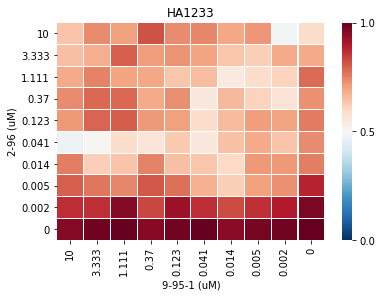

In [122]:
get_heatmap(avg2, '2-96','9-95-1','HA1233')
plt.savefig('HA1233_2-96_9-95-1_avg.png', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

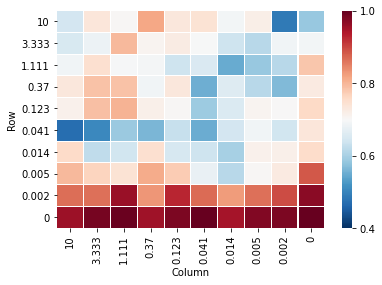

In [129]:
fig=sns.heatmap(avg2,xticklabels=Dose,yticklabels=Dose, linewidths=.1,cmap = 'RdBu_r', cbar_kws={'ticks': [0.4, 0.6,0.8, 1.0]},vmin=0.4, vmax=1, center = 0.7)

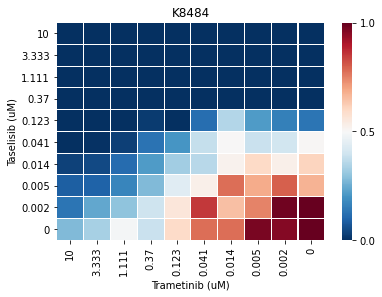

In [82]:
get_heatmap(table5,'Taselisib','Trametinib','K8484')
plt.savefig('K8484_Taselisib_Tram_3.png', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()


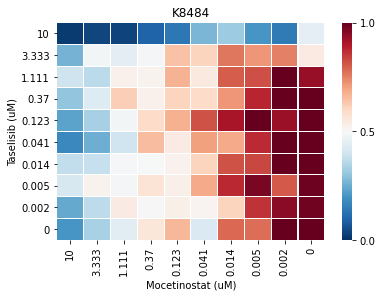

In [85]:
get_heatmap(table6, 'Taselisib','Mocetinostat', 'K8484')
plt.savefig('K8484_Taselisib_Mocetinostat_3.png', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

In [385]:
print(fig.get_facecolor())

(1.0, 1.0, 1.0, 1.0)


In [340]:
heatmap1


<AxesSubplot:xlabel='Mocesinostat (uM)', ylabel='Taselisib (uM)'>

In [341]:
heatmap2

<AxesSubplot:xlabel='Mocesinostat (uM)', ylabel='Taselisib (uM)'>

In [236]:
Day_second = getplatedata()


Please enter the plate file: PlateResults3.txt


In [237]:
Difference = Day_second['Confluency'] - Day_first['Confluency']

In [19]:
Day0=[]

In [25]:
Day0

['C:/Users/parke15/Documents/Python Scripts/Day0/CP-3-1__2021-08-13T11_18_03-Measurement 3/Evaluation1',
 'C:/Users/parke15/Documents/Python Scripts/Day0/CP-3-3__2021-08-13T11_45_55-Measurement 1/Evaluation1',
 'C:/Users/parke15/Documents/Python Scripts/Day0/CP-3-5__2021-08-13T12_11_50-Measurement 1/Evaluation1']

In [239]:
newdf = Day_first[['Row','Column']]

In [240]:
newdf['Confluency'] = Difference

In [241]:
newdf = newdf[(newdf['Row'] >3) & (newdf['Row'] < 14)]

In [242]:
newdf1 = newdf[(newdf['Column'] < 13)]

In [245]:
newdf

,Row,Column,Confluency
21,4,3,0.022077
22,4,4,0.074232
23,4,5,0.114061
24,4,6,0.243398
25,4,7,0.128451
...,...,...,...
226,13,19,0.374081
227,13,20,0.347610
228,13,21,0.337651
229,13,22,0.363634


In [243]:
attemptdf = Day_second

In [244]:
attemptdf

,Row,Column,Confluency
0,3,3,0.708020
1,3,4,0.894546
2,3,5,0.919913
3,3,6,0.947802
4,3,7,0.934725
...,...,...,...
247,14,19,0.940680
248,14,20,0.904391
249,14,21,0.916643
250,14,22,0.865327


In [144]:
attemptdf = attemptdf[(attemptdf['Row'] >3) & (attemptdf['Row'] < 14)]



In [145]:
attemptdf1 = attemptdf[(attemptdf['Column'] < 13)]

In [146]:
attemptdf1 = attemptdf1.pivot('Row','Column','Confluency')

In [147]:
attemptdf1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.718862,0.803655,0.807139,0.852610,0.866855,0.803284,0.892810,0.806958,0.801394,0.823013
5,0.929083,0.878820,0.845050,0.858851,0.928149,0.896936,0.845498,0.811574,0.783384,0.882857
6,0.862364,0.880407,0.919183,0.848942,0.850682,0.868404,0.810719,0.724424,0.843277,0.869739
7,0.884191,0.837743,0.863032,0.796914,0.846917,0.836999,0.837185,0.872177,0.868730,0.936250
8,0.916335,0.872054,0.879578,0.806922,0.818484,0.855389,0.890077,0.879626,0.882704,0.842188
9,0.838575,0.858318,0.871527,0.899817,0.915273,0.914950,0.897552,0.911686,0.838243,0.863986
10,0.917557,0.901034,0.921209,0.855977,0.927475,0.889023,0.913092,0.920091,0.897860,0.901909
11,0.900330,0.930906,0.913350,0.893231,0.925910,0.865487,0.924304,0.922267,0.905423,0.930473
12,0.923094,0.908657,0.912048,0.898107,0.949542,0.893757,0.878870,0.904156,0.917234,0.902038


In [148]:
attemptdf1 = attemptdf1/attemptdf1[12][13]

In [125]:
attemptdf1


Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.800682,0.895125,0.899006,0.949653,0.965519,0.894712,0.994429,0.898804,0.892607,0.916687
5,1.034829,0.978846,0.941232,0.956604,1.033790,0.999024,0.941731,0.903946,0.872548,0.983343
6,0.960516,0.980613,1.023803,0.945568,0.947505,0.967244,0.902994,0.806876,0.939258,0.968732
7,0.984828,0.933093,0.961260,0.887617,0.943311,0.932265,0.932472,0.971447,0.967607,1.042813
8,1.020631,0.971310,0.979690,0.898765,0.911643,0.952748,0.991385,0.979743,0.983172,0.938045
9,0.934020,0.956010,0.970722,1.002233,1.019448,1.019088,0.999710,1.015453,0.933650,0.962323
10,1.021992,1.003589,1.026059,0.953403,1.033038,0.990210,1.017019,1.024815,1.000052,1.004563
11,1.002804,1.036860,1.017306,0.994897,1.031296,0.963995,1.029507,1.027237,1.008476,1.036378
12,1.028159,1.012079,1.015856,1.000328,1.057618,0.995483,0.978901,1.007065,1.021632,1.004707


In [150]:
Dose

[10, 3.333, 1.111, 0.37, 0.123, 0.041, 0.014, 0.005, 0.002, 0]

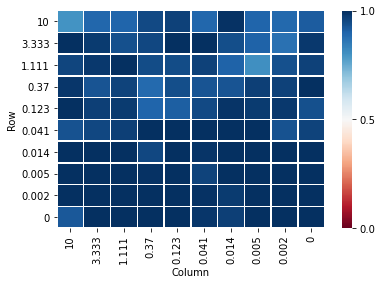

In [149]:
fig = sns.heatmap(attemptdf1,xticklabels=Dose,yticklabels=Dose, linewidths=.5,cmap="RdBu",cbar_kws={'ticks': [0.0, 0.5, 1.0]},vmin=0, vmax=1, center = 0.5)

In [127]:
Day_second.pivot('Row','Column','Confluency')

Column,3,4,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
Row,,,,,,,,,,,,,,,,,,,,,
3,0.923171,0.933060,0.911837,0.905003,0.928653,0.924147,0.925347,0.935426,0.880632,0.939422,...,0.917914,0.915376,0.929567,0.936383,0.944779,0.929290,0.805937,0.913369,0.700289,0.887925
4,0.718862,0.803655,0.807139,0.852610,0.866855,0.803284,0.892810,0.806958,0.801394,0.823013,...,0.819021,0.765906,0.858405,0.895717,0.905669,0.885428,0.869892,0.514008,0.828147,0.915798
5,0.929083,0.878820,0.845050,0.858851,0.928149,0.896936,0.845498,0.811574,0.783384,0.882857,...,0.815876,0.848410,0.836149,0.905550,0.894043,0.909334,0.844737,0.869653,0.895603,0.952537
6,0.862364,0.880407,0.919183,0.848942,0.850682,0.868404,0.810719,0.724424,0.843277,0.869739,...,0.857469,0.903780,0.808399,0.868347,0.887367,0.862231,0.848227,0.838268,0.912763,0.913213
7,0.884191,0.837743,0.863032,0.796914,0.846917,0.836999,0.837185,0.872177,0.868730,0.936250,...,0.881397,0.871385,0.870950,0.924733,0.825352,0.912886,0.818948,0.827446,0.877224,0.896213
8,0.916335,0.872054,0.879578,0.806922,0.818484,0.855389,0.890077,0.879626,0.882704,0.842188,...,0.832932,0.841835,0.849621,0.932275,0.882462,0.893910,0.879256,0.829516,0.903760,0.921964
9,0.838575,0.858318,0.871527,0.899817,0.915273,0.914950,0.897552,0.911686,0.838243,0.863986,...,0.810327,0.761967,0.846802,0.850607,0.827156,0.871795,0.866932,0.831084,0.907256,0.924791
10,0.917557,0.901034,0.921209,0.855977,0.927475,0.889023,0.913092,0.920091,0.897860,0.901909,...,0.796346,0.858585,0.907990,0.928837,0.842943,0.842721,0.860751,0.873751,0.898759,0.880949
11,0.900330,0.930906,0.913350,0.893231,0.925910,0.865487,0.924304,0.922267,0.905423,0.930473,...,0.885639,0.881880,0.888055,0.882131,0.880949,0.907239,0.922966,0.923126,0.899554,0.921094


In [246]:
newdf2 = newdf[(newdf['Column']>= 13)&(newdf['Column']< 23)]

In [247]:
newdff1 = newdf1.pivot('Row','Column','Confluency')
newdff2 = newdf2.pivot('Row','Column','Confluency')

In [248]:
newdff1


Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.022077,0.074232,0.114061,0.243398,0.128451,0.194174,0.193239,0.264542,0.143933,0.282534
5,0.021025,0.084303,0.198305,0.196335,0.204978,0.234361,0.179694,0.164327,0.227875,0.314478
6,0.036212,0.079593,0.149493,0.139503,0.179673,0.158658,0.148512,0.150109,0.202232,0.313947
7,0.032972,0.077043,0.108642,0.153313,0.152737,0.222095,0.207856,0.245068,0.266354,0.321814
8,0.019933,0.067799,0.111597,0.065072,0.171626,0.247288,0.283173,0.355699,0.315871,0.366516
9,0.045989,0.294395,0.110365,0.167906,0.167138,0.287161,0.325047,0.351347,0.352573,0.338911
10,0.024774,0.154806,0.330812,0.195226,0.292398,0.370118,0.348780,0.331521,0.364550,0.415408
11,0.048967,0.230684,0.205492,0.308354,0.386211,0.361244,0.374304,0.322768,0.304911,0.398710
12,0.072034,0.212839,0.313370,0.327919,0.339504,0.362257,0.352421,0.304999,0.349210,0.356221


In [72]:
newdff1 = newdff1/newdff1[12][13]

In [93]:
newdff2 = newdff2/newdff2[22][13]

In [73]:
newdff1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.627449,0.725026,0.800624,0.828286,0.888279,0.763703,0.911237,0.670725,0.845311,0.913902
5,0.889303,0.819497,0.805106,0.823837,0.850233,0.909740,0.818870,0.932578,0.872178,0.856567
6,0.716006,0.900664,0.886775,0.812610,0.838859,0.899146,0.862124,0.738464,0.912138,0.976133
7,0.913937,0.860265,0.838745,0.910873,0.862821,0.891089,0.988773,0.914291,0.851038,0.988997
8,0.881847,0.818683,0.984948,0.916708,0.959607,1.006030,0.938176,0.955936,1.105198,1.081076
9,0.927146,0.949128,0.887341,0.920859,1.044133,1.087301,0.994191,1.044045,1.099198,1.080715
10,0.977635,1.025993,0.886474,0.834900,0.965945,0.992591,1.033625,1.068243,1.054369,1.057333
11,0.956386,0.984921,0.940826,0.939140,1.078033,0.964081,1.013293,1.031660,0.866556,1.078880
12,1.010224,1.064204,1.040098,0.857748,0.980377,1.054533,0.998216,1.006866,1.023715,0.982536


In [249]:
newdff2

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.057130,0.143435,0.116839,0.114296,0.101921,0.109332,0.103712,0.119272,0.128306,0.091661
5,0.174922,0.128976,0.211435,0.153758,0.275254,0.188043,0.303219,0.234826,0.185958,0.227154
6,0.102877,0.115697,0.230219,0.268093,0.255684,0.317323,0.340279,0.362580,0.390724,0.318134
7,-0.011310,0.058945,0.271389,0.288631,0.316654,0.368488,0.370407,0.427877,0.428898,0.374830
8,0.016222,0.031095,0.250164,0.314516,0.330776,0.408173,0.419792,0.416950,0.390041,0.360830
9,0.051611,0.078817,0.295474,0.339325,0.364924,0.365407,0.403392,0.414571,0.394720,0.377562
10,0.117873,0.085622,0.268840,0.302662,0.367347,0.388626,0.391318,0.393729,0.377496,0.354997
11,0.083639,0.107194,0.294621,0.320424,0.335072,0.335901,0.410813,0.401316,0.372257,0.346747
12,0.109108,0.151829,0.327985,0.351679,0.332274,0.396532,0.378002,0.412053,0.359347,0.311821


In [250]:
testing = newdff2/newdff2[22][13]

In [251]:
testing

Column,13,14,15,16,17,18,19,20,21,22
Row,,,,,,,,,,
4,0.157109,0.394449,0.321309,0.314317,0.280286,0.300664,0.285208,0.328000,0.352845,0.252070
5,0.481039,0.354686,0.581450,0.422837,0.756952,0.517122,0.833857,0.645776,0.511388,0.624676
6,0.282914,0.318170,0.633106,0.737260,0.703136,0.872643,0.935772,0.997100,1.074497,0.874874
7,-0.031103,0.162100,0.746323,0.793739,0.870805,1.013349,1.018625,1.176668,1.179477,1.030789
8,0.044611,0.085513,0.687956,0.864923,0.909639,1.122482,1.154436,1.146621,1.072618,0.992287
9,0.141932,0.216747,0.812559,0.933149,1.003547,1.004875,1.109334,1.140077,1.085486,1.038301
10,0.324153,0.235462,0.739315,0.832324,1.010209,1.068728,1.076131,1.082760,1.038119,0.976249
11,0.230009,0.294785,0.810212,0.881171,0.921454,0.923733,1.129741,1.103625,1.023712,0.953559
12,0.300049,0.417533,0.901964,0.967122,0.913759,1.090469,1.039511,1.133153,0.988209,0.857513


In [80]:
newdff1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.627449,0.725026,0.800624,0.828286,0.888279,0.763703,0.911237,0.670725,0.845311,0.913902
5,0.889303,0.819497,0.805106,0.823837,0.850233,0.909740,0.818870,0.932578,0.872178,0.856567
6,0.716006,0.900664,0.886775,0.812610,0.838859,0.899146,0.862124,0.738464,0.912138,0.976133
7,0.913937,0.860265,0.838745,0.910873,0.862821,0.891089,0.988773,0.914291,0.851038,0.988997
8,0.881847,0.818683,0.984948,0.916708,0.959607,1.006030,0.938176,0.955936,1.105198,1.081076
9,0.927146,0.949128,0.887341,0.920859,1.044133,1.087301,0.994191,1.044045,1.099198,1.080715
10,0.977635,1.025993,0.886474,0.834900,0.965945,0.992591,1.033625,1.068243,1.054369,1.057333
11,0.956386,0.984921,0.940826,0.939140,1.078033,0.964081,1.013293,1.031660,0.866556,1.078880
12,1.010224,1.064204,1.040098,0.857748,0.980377,1.054533,0.998216,1.006866,1.023715,0.982536


Text(0.5, 15.0, 'Taselisib (uM)')

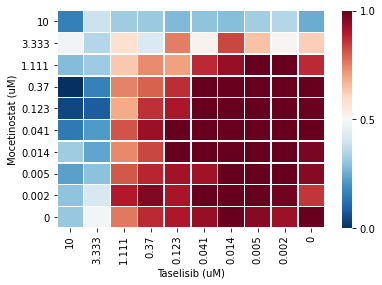

In [307]:
fig = sns.heatmap(table4,xticklabels=Dose,yticklabels=Dose, linewidths=.5,cmap = 'RdBu_r', cbar_kws={'ticks': [0.0, 0.5, 1.0]},vmin=0, vmax=1, center = 0.5)
fig.set_ylabel('Mocetinostat (uM)')
fig.set_xlabel ('Taselisib (uM)')


In [136]:
newdff1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.218179,0.252109,0.278396,0.288015,0.308876,0.265558,0.316859,0.233227,0.293935,0.317786
5,0.309232,0.284959,0.279955,0.286468,0.295647,0.316339,0.284741,0.324280,0.303278,0.297849
6,0.248973,0.313183,0.308353,0.282564,0.291691,0.312655,0.299781,0.256782,0.317172,0.339425
7,0.317798,0.299135,0.291652,0.316732,0.300024,0.309853,0.343820,0.317921,0.295927,0.343898
8,0.306639,0.284676,0.342490,0.318762,0.333679,0.349821,0.326227,0.332402,0.384304,0.375916
9,0.322391,0.330035,0.308550,0.320205,0.363070,0.378081,0.345704,0.363040,0.382218,0.375791
10,0.339947,0.356763,0.308248,0.290315,0.335883,0.345148,0.359417,0.371454,0.366629,0.367660
11,0.332559,0.342481,0.327148,0.326562,0.374858,0.335234,0.352347,0.358733,0.301323,0.375153
12,0.351279,0.370049,0.361667,0.298260,0.340901,0.366687,0.347104,0.350112,0.355971,0.341652


In [29]:
newdff1

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,-0.184145,-0.126163,-0.115314,-0.171095,-0.242135,-0.169692,-0.137495,-0.141020,-0.144842,-0.146249
5,-0.297970,-0.176830,-0.158975,-0.173753,-0.150326,-0.193825,-0.167613,-0.141546,-0.140770,-0.149766
6,-0.182268,-0.137541,-0.056421,-0.100441,-0.121690,0.044596,0.050974,0.003539,-0.037263,-0.065525
7,-0.130096,-0.131345,0.018607,-0.009364,0.199575,0.173106,0.165701,0.220968,0.159411,0.099567
8,-0.079927,0.125077,0.228053,0.304695,0.429692,0.370528,0.171928,0.308476,0.280243,0.223549
9,0.065727,0.177767,0.267276,0.296471,0.266387,0.160292,0.087103,0.175721,0.331290,0.370387
10,0.159086,0.239690,0.196948,0.344164,0.410382,0.392362,0.310557,0.222788,0.232439,0.254624
11,0.212417,0.260237,0.226788,0.350749,0.304583,0.320997,0.321184,0.223454,0.299174,0.370246
12,0.272036,0.341787,0.273658,0.410050,0.376545,0.146107,0.252740,0.147906,0.315247,0.277293


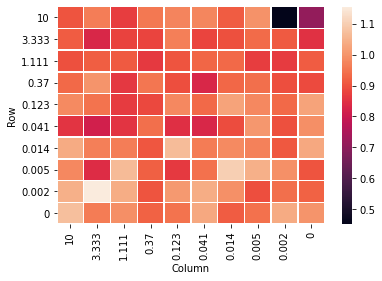

In [95]:
fig = sns.heatmap(newdff2,xticklabels=Dose,yticklabels=Dose, linewidths=.5)

In [482]:
newdf1 = newdf[newdf['Column'].values < 13]

In [483]:
newdf2 = newdf[(newdf['Column'].values >=13) & (newdf['Column'].values < 23)]

In [484]:
newdf2.shape

(100, 3)

In [491]:
newdff1 = newdf1.pivot(newdf1.columns[0],newdf1.columns[1],newdf1.columns[2])

ValueError: Length of passed values is 100, index implies 1.

In [490]:
newdf.columns[0]

('Row',)

In [444]:
df_pivot = (newdf.set_index(['Row'])
        .pivot(columns='Column')['Confluency']
        .reset_index()
     )

ValueError: Index data must be 1-dimensional

In [383]:
Difference

,Confluency
0,0.531246
1,0.540465
2,0.440467
3,0.518948
4,-0.008290
...,...
247,0.103505
248,0.038030
249,0.505688
250,0.596663


In [421]:
newdf = Day_second[['Row','Column']]
newdf['Confluency'] = Difference

,Column
0,3
1,4
2,5
3,6
4,7
...,...
247,19
248,20
249,21
250,22


In [463]:
newdf[['Row','Column']].values.astype(int)


array([[ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 3, 12],
       [ 3, 13],
       [ 3, 14],
       [ 3, 15],
       [ 3, 16],
       [ 3, 17],
       [ 3, 18],
       [ 3, 19],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 4, 11],
       [ 4, 12],
       [ 4, 13],
       [ 4, 14],
       [ 4, 15],
       [ 4, 16],
       [ 4, 17],
       [ 4, 18],
       [ 4, 19],
       [ 4, 20],
       [ 4, 21],
       [ 4, 22],
       [ 4, 23],
       [ 5,  3],
       [ 5,  4],
       [ 5,  5],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 5, 11],
       [ 5, 12],
       [ 5, 13],
       [ 5, 14],
       [ 5, 15],
       [ 5, 16],
       [ 5, 17],
       [ 5, 18],
       [ 5, 19

In [466]:
newdf['Row'] = newdf['Row'].values.astype(int)
newdf['Column'] = newdf['Column'].values.astype(int)

,Row,Column,Confluency
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
247,14.0,NaN,NaN
248,14.0,NaN,NaN
249,14.0,NaN,NaN
250,14.0,NaN,NaN


In [455]:
newdf=newdf.astype(float)

In [458]:
newdf[newdf['Row']>3]

,Row,Column,Confluency
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
247,14.0,NaN,NaN
248,14.0,NaN,NaN
249,14.0,NaN,NaN
250,14.0,NaN,NaN


In [453]:
D['Row'].dtype

dtype('int64')

In [188]:
A = pd.read_csv('day0.csv')

In [189]:
B = pd.read_csv('day3.csv')

In [211]:
from sklearn import preprocessing

In [355]:
B['Confluency']

0      0.732733
1      0.708487
2      0.574981
3      0.730623
4      0.013128
         ...   
247    0.116310
248    0.085817
249    0.700708
250    0.797582
251    0.728855
Name: Confluency, Length: 252, dtype: float64

In [190]:
A = A[['Row','Column','Confluency']]

In [191]:
B = B[['Row','Column','Confluency']]

In [192]:
C = B['Confluency'] - A['Confluency']

In [193]:
D = A[['Row','Column']]

In [194]:
D

,Row,Column
0,3,3
1,3,4
2,3,5
3,3,6
4,3,7
...,...,...
247,14,19
248,14,20
249,14,21
250,14,22


In [446]:
D.shape

    

(210, 3)

In [195]:
D['Confluency'] = C

In [196]:
D

,Row,Column,Confluency
0,3,3,0.531246
1,3,4,0.540465
2,3,5,0.440467
3,3,6,0.518948
4,3,7,-0.008290
...,...,...,...
247,14,19,0.103505
248,14,20,0.038030
249,14,21,0.505688
250,14,22,0.596663


In [197]:
D = D[(D['Row']> 3 )&(D['Row'] < 14)]

In [198]:
D

,Row,Column,Confluency
21,4,3,0.157489
22,4,4,0.172845
23,4,5,0.321585
24,4,6,0.390409
25,4,7,0.434757
...,...,...,...
226,13,19,0.564576
227,13,20,0.650235
228,13,21,0.517760
229,13,22,0.478339


In [199]:
D1 = D[(D['Column']<13)]

In [200]:
D1.shape

(100, 3)

In [205]:
D2 = D[(D['Column']>=13)&(D['Column']<23)]

In [117]:
D12 = D1.set_index(['Row','Column'])

In [206]:
D2.shape

(100, 3)

In [118]:
D12

Confluency
Row Column            
4   3         0.157489
    4         0.172845
    5         0.321585
    6         0.390409
    7         0.434757
...                ...
13  8         0.589196
    9         0.579461
    10        0.583973
    11        0.615146
    12        0.307352

[100 rows x 1 columns]

In [102]:
D2= D[(D['Column']>13)&(D['Column']<24)]

In [103]:
D2

,Row,Column
32,4,14
33,4,15
34,4,16
35,4,17
36,4,18
...,...,...
226,13,19
227,13,20
228,13,21
229,13,22


In [63]:
D1

,Row,Column,Confluency
21,4,3,0.157489
22,4,4,0.172845
23,4,5,0.321585
24,4,6,0.390409
25,4,7,0.434757
...,...,...,...
215,13,8,0.589196
216,13,9,0.579461
217,13,10,0.583973
218,13,11,0.615146


In [81]:
index = D1['Row']

In [82]:
columns = D1['Column']

In [85]:
D1 = D1.set_index('Row')

In [123]:
D1

,Row,Column,Confluency
21,4,3,0.157489
22,4,4,0.172845
23,4,5,0.321585
24,4,6,0.390409
25,4,7,0.434757
...,...,...,...
215,13,8,0.589196
216,13,9,0.579461
217,13,10,0.583973
218,13,11,0.615146


In [89]:
D3

Row
4      3
4      4
4      5
4      6
4      7
      ..
13     8
13     9
13    10
13    11
13    12
Name: Column, Length: 100, dtype: int64

In [121]:
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = pd.DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

In [122]:
df

,A,B,C,D
aaa,1.155034,1.072782,1.243091,1.731202
bbb,1.734135,0.097896,0.915044,1.669975
ccc,1.263728,0.865795,1.542325,1.585156
ddd,2.611025,1.258231,0.307523,0.102240
eee,0.378390,1.185686,0.518390,2.162684


In [137]:
D1=D1.reset_index()

In [180]:
D

,Row,Column,Confluency
21,4,3,0.157489
22,4,4,0.172845
23,4,5,0.321585
24,4,6,0.390409
25,4,7,0.434757
...,...,...,...
226,13,19,0.564576
227,13,20,0.650235
228,13,21,0.517760
229,13,22,0.478339


In [179]:
D1

,Row,Column,Confluency
0,4,3,0.157489
1,4,4,0.172845
2,4,5,0.321585
3,4,6,0.390409
4,4,7,0.434757
...,...,...,...
95,13,8,0.589196
96,13,9,0.579461
97,13,10,0.583973
98,13,11,0.615146


In [153]:
Conf =[]

In [154]:
for k in D1['Confluency']:
    Conf.append(k)

In [155]:
Conf

[0.15748926,
 0.17284464800000002,
 0.321584972,
 0.390409385,
 0.43475665199999997,
 0.40695487599999997,
 0.41491686499999997,
 0.437077268,
 0.473119843,
 0.398162052,
 0.191939438,
 0.23023593800000003,
 0.49277440299999997,
 0.497653354,
 0.45986262599999994,
 0.47735082,
 0.507565503,
 0.48762546400000006,
 0.4591774350000001,
 0.421219766,
 0.193145891,
 0.18396346600000002,
 0.48089359299999995,
 0.574619821,
 0.53640464,
 0.524495002,
 0.544024357,
 0.543653686,
 -0.009123264999999998,
 0.488601297,
 0.20171325899999998,
 0.21316595800000002,
 0.5559869169999999,
 0.5527403790000001,
 0.5716906,
 0.559600252,
 0.5596187539999999,
 0.48990348399999994,
 0.5073727459999999,
 0.513230971,
 0.225893094,
 0.22592837600000001,
 0.5168348420000001,
 0.53781934,
 0.519709634,
 0.592103066,
 0.541385132,
 0.567569125,
 0.564986051,
 0.5068486870000001,
 0.14722967599999998,
 0.18876088100000002,
 0.544684377,
 0.644381989,
 0.606229197,
 0.528937237,
 0.584197657,
 0.562780746,
 0.5426

,Row,Column,Confluency
0,4,3,0.157489
1,4,4,0.172845
2,4,5,0.321585
3,4,6,0.390409
4,4,7,0.434757
...,...,...,...
95,13,8,0.589196
96,13,9,0.579461
97,13,10,0.583973
98,13,11,0.615146


In [165]:
testing2

,3,4,5,6,7,8,9,10,11,12,...,3,4,5,6,7,8,9,10,11,12
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
13,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
13,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
13,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [161]:
D1['Confluency']

0     0.157489
1     0.172845
2     0.321585
3     0.390409
4     0.434757
        ...   
95    0.589196
96    0.579461
97    0.583973
98    0.615146
99    0.307352
Name: Confluency, Length: 100, dtype: float64

<AxesSubplot:xlabel='year', ylabel='month'>

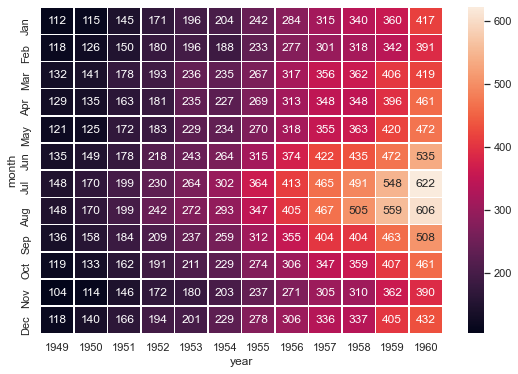

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [172]:
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [173]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [521]:
Day_first[(Day_first['Row']==6)&(Day_first['Column']==11)]

,Row,Column,Confluency
71,6,11,0.033312


In [522]:
Day_second[(Day_second['Row']==6)&(Day_second['Column']==11)]

,Row,Column,Confluency
71,6,11,0.024189


In [208]:
D100 = D1.pivot("Row", "Column", "Confluency")

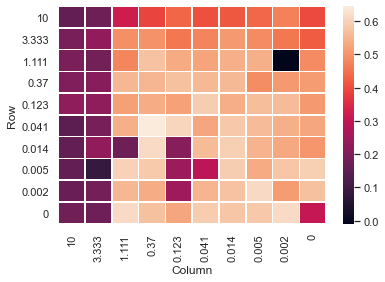

In [333]:

fig = sns.heatmap(D100,xticklabels=Dose,yticklabels=Dose, linewidths=.5)


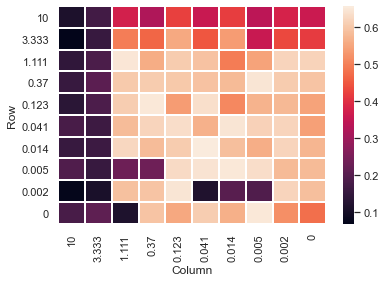

In [523]:
fig = sns.heatmap(D200,xticklabels=Dose,yticklabels=Dose, linewidths=1)

In [278]:
D100

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,0.157489,0.172845,0.321585,0.390409,0.434757,0.406955,0.414917,0.437077,0.473120,0.398162
5,0.191939,0.230236,0.492774,0.497653,0.459863,0.477351,0.507566,0.487625,0.459177,0.421220
6,0.193146,0.183963,0.480894,0.574620,0.536405,0.524495,0.544024,0.543654,-0.009123,0.488601
7,0.201713,0.213166,0.555987,0.552740,0.571691,0.559600,0.559619,0.489903,0.507373,0.513231
8,0.225893,0.225928,0.516835,0.537819,0.519710,0.592103,0.541385,0.567569,0.564986,0.506849
9,0.147230,0.188761,0.544684,0.644382,0.606229,0.528937,0.584198,0.562781,0.542685,0.529150
10,0.158534,0.228849,0.172392,0.614637,0.214241,0.560324,0.594673,0.549883,0.531964,0.502113
11,0.157620,0.085173,0.598537,0.585739,0.243768,0.293318,0.591719,0.535748,0.579541,0.594221
12,0.168164,0.186995,0.557038,0.538787,0.249616,0.551818,0.574721,0.611383,0.512485,0.570782


In [17]:
Dose

[10, 3.333, 1.111, 0.37, 0.123, 0.041, 0.014, 0.005, 0.002, 0]

In [274]:
ax.set_xlabel['a']

TypeError: 'method' object is not subscriptable

In [209]:
D200 = D2.pivot("Row",'Column','Confluency')

In [41]:
Dose = [10]

In [42]:
for i in range(0,8,1):
    Dose.append(round(Dose[-1]/3,3))


In [43]:
Dose.append(0)

In [298]:
D111 = D100.rename(index=Dose)

TypeError: 'list' object is not callable

<AxesSubplot:xlabel='year', ylabel='month'>

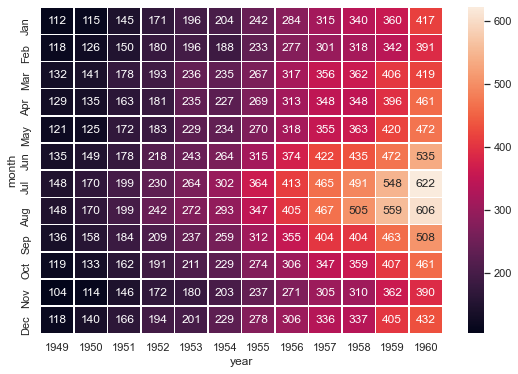

In [293]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [294]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


TypeError: Index does not support mutable operations

In [317]:
for i in range(len(D100.index)):
    D100.index.values[i] = 4+i
    

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

<AxesSubplot:xlabel='Column', ylabel='Row'>

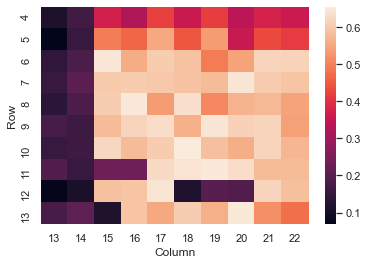

In [210]:
sns.heatmap(D200)

In [213]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(D200.values)


In [216]:
final_df = pd.DataFrame(scaled_df)

In [220]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(D200)

<AxesSubplot:>

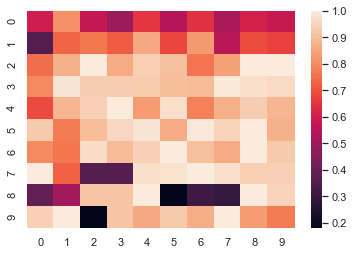

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Name: Row, Length: 252, dtype: bool

In [155]:
Difference_K_8484 = K_8484_2['Confluency'] - K_8484_1['Confluency']

In [156]:
Difference_K_8484

0      0.377852
1      0.344968
2      0.399200
3      0.376880
4      0.405287
         ...   
247    0.360350
248    0.355921
249    0.308141
250    0.382652
251    0.358747
Name: Confluency, Length: 252, dtype: float64

In [157]:
New_8484 = K_8484_1[['Row','Column']]

In [158]:
New_8484['Confluency'] = Difference_K_8484

In [188]:
New_8484

,Row,Column,Confluency
21,4,3,-0.105753
22,4,4,-0.138195
23,4,5,-0.142220
24,4,6,-0.122738
25,4,7,-0.127172
...,...,...,...
226,13,19,0.354952
227,13,20,0.300781
228,13,21,0.330708
229,13,22,0.321318


In [160]:
New_8484 = New_8484[(New_8484['Row'] >3) & (New_8484['Row'] < 14)]

In [148]:
pandasgui.show(avg)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI...
PandasGUI WARNING — pandasgui.utility — In _147, converted column names to string: 3, 4, 5, 6, 7, 8, 9, 10, 11, 12


In [163]:
K_8484_first = New_8484[New_8484['Column'].values < 13]

,Row,Column,Confluency
21,4,3,-0.105753
22,4,4,-0.138195
23,4,5,-0.142220
24,4,6,-0.122738
25,4,7,-0.127172
...,...,...,...
215,13,8,0.325448
216,13,9,0.371780
217,13,10,0.401910
218,13,11,0.435786


In [165]:
K_8484_first_pv = K_8484_first.pivot('Row','Column','Confluency')

In [169]:
K_8484_first_pv_rel = K_8484_first_pv/K_8484_first_pv[12][13]

In [170]:
K_8484_first_pv_rel

Column,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,
4,-0.305730,-0.399519,-0.411156,-0.354832,-0.367653,-0.290137,-0.321751,-0.257820,-0.300327,-0.355937
5,-0.503281,-0.348396,-0.301823,-0.247765,-0.051533,-0.329531,-0.299111,-0.268190,-0.257276,-0.330406
6,-0.417104,-0.241652,0.645514,-0.410952,-0.283257,-0.252414,0.092651,-0.228384,-0.297650,-0.257204
7,-0.167943,0.641128,0.351817,-0.083985,0.019061,0.395331,0.032499,0.064959,0.073410,0.369146
8,0.932553,0.882864,0.866340,0.983979,0.956977,1.010962,0.985813,1.107466,0.997191,1.132865
9,0.944336,1.070049,1.240422,0.980633,1.036515,1.144970,1.149466,1.073985,1.152029,1.244232
10,0.968335,1.030275,1.040381,1.204079,1.023198,1.088580,1.036819,1.181397,1.193730,1.076801
11,1.011886,1.115871,1.146457,0.964473,1.063232,1.005999,1.063205,1.038013,0.964265,1.195483
12,1.001513,1.112395,1.135659,1.160817,1.026045,0.994142,1.094254,1.105541,1.167761,1.186393


In [168]:
K_8484_first_pv[12][13]

0.345903351223

Text(33.0, 0.5, '2-96')

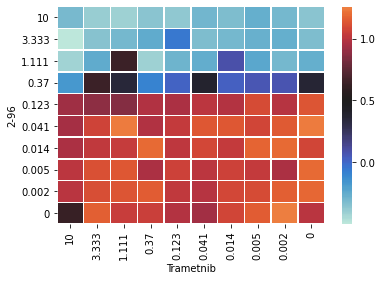

In [177]:
K_8484_second = New_8484[(New_8484['Column']>= 13)&(New_8484['Column']< 23)]

In [179]:
K_8484_second_pv = K_8484_second.pivot('Row','Column','Confluency')

In [152]:
avg.columns = Dose

In [154]:
avg.rows = Dose

<ipython-input-154-f578ba3a3e7a>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [168]:
Dose.reverse()

In [173]:
Dose.sort()

In [163]:
avg = avg.reindex(columns=Dose)

In [171]:
avg.index = Dose

In [175]:
avg = avg.reindex(index=Dose)

In [176]:
avg

,0.000,0.002,0.005,0.014,0.041,0.123,0.370,1.111,3.333,10.000
0.000,1.000000,0.937036,0.956922,0.885078,0.923436,0.921958,0.967255,0.930353,0.844316,0.808254
0.002,0.918488,0.994767,0.960540,0.769587,0.895240,0.912110,0.837835,0.866463,0.870795,0.900148
0.005,0.820918,0.903970,0.997825,0.968901,0.856341,0.907550,0.845252,0.831453,0.864265,0.838009
0.014,0.751337,0.850477,0.872456,0.739357,0.732590,0.892567,0.618099,0.802255,0.788343,0.771351
0.041,0.794661,0.697878,0.735521,0.700610,0.770568,0.721810,0.714323,0.674660,0.713460,0.808102
0.123,0.569577,0.662027,0.682263,0.527074,0.681834,0.553539,0.626883,0.675270,0.654513,0.666281
0.370,0.707709,0.609402,0.636977,0.611628,0.566453,0.616813,0.510061,0.605743,0.519399,0.593198
1.111,0.607310,0.609454,0.520695,0.619716,0.620764,0.586326,0.646897,0.549930,0.603646,0.620072
3.333,0.626975,0.611715,0.687009,0.564217,0.616093,0.671185,0.655349,0.595013,0.624129,0.657919
10.000,0.636269,0.596483,0.558687,0.663866,0.574962,0.609402,0.602757,0.545988,0.514601,0.488692


Text(39.5, 0.5, '2-96')

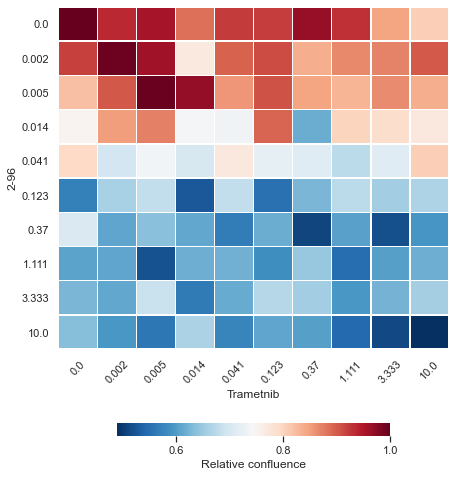

In [216]:
plt.figure()
sns.set(rc={"figure.figsize":(7, 9)})
fig = sns.heatmap(avg,cmap = 'RdBu_r',cbar_kws={'ticks': [0.4, 0.6,0.8, 1.0],'orientation':'horizontal', 'shrink': .7,"label": "Relative confluence"},  linewidths=.5, )

plt.xticks(rotation="45")
plt.yticks(rotation="0")
plt.xlabel('Trametnib')
plt.ylabel('2-96')